In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [62]:
data=pd.read_csv('Data.csv',delimiter=',',dtype=float)

In [63]:
data.head(11)

,Size (sqft),Number of Bedrooms,Number of floors,Age of Home,Price (1000s dollars
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0
5,1314.0,2.0,1.0,14.0,415.0
6,864.0,2.0,1.0,66.0,230.0
7,1836.0,3.0,1.0,17.0,560.0
8,1026.0,3.0,1.0,43.0,294.0
9,3194.0,4.0,2.0,87.0,718.2


In [64]:
x_train=np.array(data[['Size (sqft)','Number of Bedrooms','Number of floors','Age of  Home']]);y_train=np.array(data['Price (1000s dollars'])

In [65]:
def feature_scaling(x):
    #x:  input feature with shape (m,n) m:number of training examples, n: number of features
    m,n=x.shape
    mu=np.mean(x, axis=0,keepdims=True)
    sigma=np.std(x,axis=0,keepdims=True)
    x_scaled=(x-mu)/sigma
    return mu,sigma,x_scaled

In [66]:
def cost_function(w,b,x,y):
    #w: model parameter, ndarray with shape (n,) n:number of features
    #b: model parameter, scalar
    #x: input features for all m-training examples shape:ndarray(m,n)
    #y: target values with shape (m,)
    loss=np.matmul(x,w)+b-y
    cost=(1/2)*np.mean(np.square(loss))
    return cost

In [72]:
def update_w_b(x,y,alpha,w_init,b_init,num_iter):
    #w_init:model parameter w with shape (n,) n:number of features
    #b_init: model parameter, Scalar
    #X: input feture array with shape (m,n) m:number of training examples
    #y: target values with shape (m,)
    m,n= x.shape
    w=w_init;b=b_init
    cost_history=[]
    for i in range (num_iter): 
        dj_dw=(1/m)*(np.matmul(np.transpose((np.matmul(x,w)+b-y)),x))
        dj_db=np.mean(np.matmul(x,w)+b-y)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        cost=cost_function(w,b,x,y)
        cost_history.append(cost)
    return w,b, cost_history   
        

In [75]:
m,n=x_train.shape
w_init=np.zeros(n);b_init=0;alpha=0.1;num_iter=200;
mu,sigma,x_scaled=feature_scaling(x_train) #feature scaling. By using feature scaling a much higher 
                                    #value for apha can be used and so the cost will be decreased much rapidly
w,b,cost_history=update_w_b(x_scaled,y_train,alpha,w_init,b_init,num_iter)

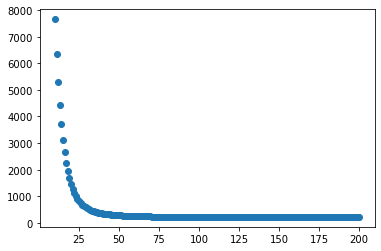

In [76]:
fig=plt.figure()
ax=fig.add_subplot()
ax.scatter(np.linspace(10,num_iter,num_iter-10),cost_history[10:])

In [77]:
def predict(w,b,x,mu,sigma): #To predict new values, the data should be normalized using the same mu and sigma we used before
    x_scaled=(x-mu)/sigma
    y_predict=np.matmul(x_scaled,w)+b
    return y_predict

In [100]:
y_predict=predict(w,b,x_train,mu,sigma)
df=pd.DataFrame(np.concatenate((x_train,np.expand_dims(y_train,axis=1),np.expand_dims(y_predict,axis=1)),axis=1),columns=['Size (sqft)','Number of Bedrooms','Number of floors','Age of  Home','Price','Predicted price'])
df.head(11)

,Size (sqft),Number of Bedrooms,Number of floors,Age of Home,Price,Predicted price
0,952.0,2.0,1.0,65.0,271.5,248.649710
1,1244.0,3.0,1.0,64.0,300.0,295.581407
2,1947.0,3.0,2.0,17.0,509.8,485.797493
3,1725.0,3.0,2.0,42.0,394.0,389.625393
4,1959.0,3.0,2.0,15.0,540.0,491.946848
5,1314.0,2.0,1.0,14.0,415.0,420.473394
6,864.0,2.0,1.0,66.0,230.0,223.588601
7,1836.0,3.0,1.0,17.0,560.0,523.210692
8,1026.0,3.0,1.0,43.0,294.0,267.913879
9,3194.0,4.0,2.0,87.0,718.2,684.710752


In [101]:
##Using Sklearn 
import sklearn as SK
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor 

In [103]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_train)
sgdr=SGDRegressor(max_iter=10000)
sgdr.fit(x_scaled,y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(max_iter=10000)
number of iterations completed: 122, number of weight updates: 12201.0


In [104]:
b_sklearn=sgdr.intercept_;w_sklearn=sgdr.coef_
print(f"model parameters:                   w: {w_sklearn}, b:{b_sklearn}")
print(f"model parameters from above part (programmed GD): w: {w}, b: {b}")

model parameters:                   w: [110.08192838 -21.22936719 -32.41536079 -37.84893198], b:[362.24343286]
model parameters from above part (programmed GD): w: [110.51475154 -21.4234692  -32.60598917 -37.79863911], b: 362.23951974443713


In [105]:
x_scaled_2=scaler.transform(x_train) #use "transform" not "transform_fit" here 
y_pred_sgd = sgdr.predict(x_scaled_2)
df_2=pd.DataFrame(np.concatenate((x_train,np.expand_dims(y_train,axis=1),np.expand_dims(y_pred_sgd,axis=1)),axis=1),columns=['Size (sqft)','Number of Bedrooms','Number of floors','Age of  Home','Price','Predicted price'])
df.head(11)

,Size (sqft),Number of Bedrooms,Number of floors,Age of Home,Price,Predicted price
0,952.0,2.0,1.0,65.0,271.5,248.649710
1,1244.0,3.0,1.0,64.0,300.0,295.581407
2,1947.0,3.0,2.0,17.0,509.8,485.797493
3,1725.0,3.0,2.0,42.0,394.0,389.625393
4,1959.0,3.0,2.0,15.0,540.0,491.946848
5,1314.0,2.0,1.0,14.0,415.0,420.473394
6,864.0,2.0,1.0,66.0,230.0,223.588601
7,1836.0,3.0,1.0,17.0,560.0,523.210692
8,1026.0,3.0,1.0,43.0,294.0,267.913879
9,3194.0,4.0,2.0,87.0,718.2,684.710752
